# 1. Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# 2. Import dataset

In [3]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

# 3. Exploratory data analysis

Lets explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [10]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# 4. Declare feature vector and target variable

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# 5. Split data into separate training and test set

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)


In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# 6. Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1512,low,med,2,2,small,low
1433,low,high,3,2,small,high
741,high,med,5more,4,med,low
1610,low,med,5more,4,big,high
1097,med,med,2,4,big,high


We can see that all  the variables are ordinal categorical data type.

In [17]:
# import category encoders

import category_encoders as ce

In [18]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1512,1,1,1,1,1,1
1433,1,2,2,1,1,2
741,2,1,3,2,2,1
1610,1,1,3,2,3,2
1097,3,1,1,2,3,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
524,2,3,3,2,1,2
956,3,3,3,2,1,2
895,3,3,2,1,2,3
581,2,2,2,2,2,2
1327,1,3,2,1,2,3


We now have training and test set ready for model building. 

# 7. Decision Tree Classifier with criterion gini index

In [21]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [22]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [23]:
y_pred_gini = clf_gini.predict(X_test)


### Check accuracy score with criterion gini index

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8056


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [25]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [26]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8055


### Check for overfitting and underfitting

In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8055
Test set score: 0.8056


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.458\nsamples = 1157\nvalue = [257, 46, 810, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 394\nvalue = [0, 0, 394, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.582\nsamples = 763\nvalue = [257, 46, 416, 44]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 250\nvalue = [0, 0, 250, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 3.5\ngini = 0.629\nsamples = 513\nvalue = [257, 46, 166, 44]'),
 Text(0.5, 0.125, 'gini = 0.629\nsamples = 390\nvalue = [211, 46, 89, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.468\nsamples = 123\nvalue = [46, 0, 77, 0]')]

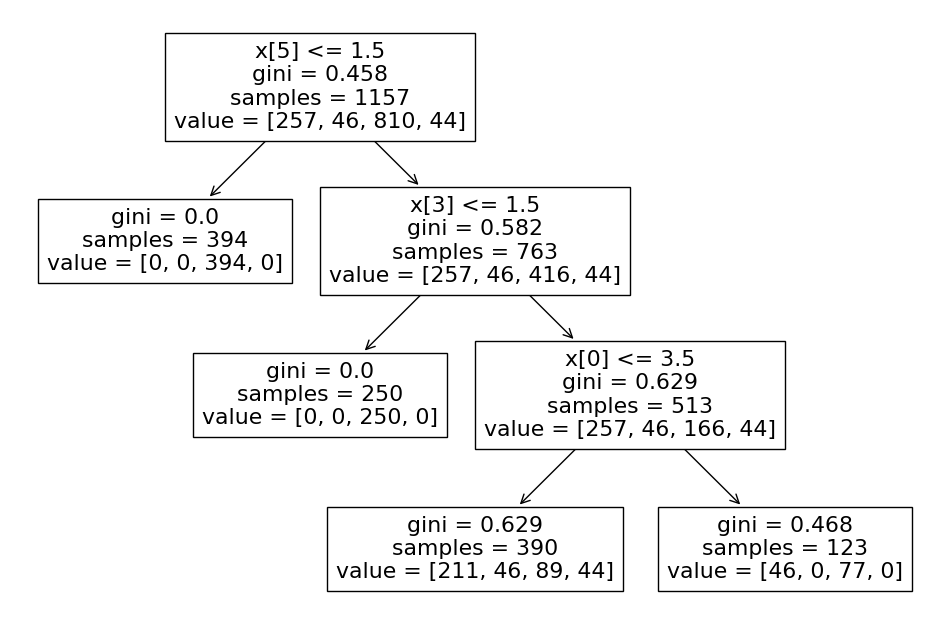

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# 8. Decision Tree Classifier with criterion entropy

In [29]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [30]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8056


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [32]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8055


### Check for overfitting and underfitting

In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8055
Test set score: 0.8056


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.207\nsamples = 1157\nvalue = [257, 46, 810, 44]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 394\nvalue = [0, 0, 394, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.488\nsamples = 763\nvalue = [257, 46, 416, 44]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 250\nvalue = [0, 0, 250, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 3.5\nentropy = 1.642\nsamples = 513\nvalue = [257, 46, 166, 44]'),
 Text(0.5, 0.125, 'entropy = 1.685\nsamples = 390\nvalue = [211, 46, 89, 44]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.954\nsamples = 123\nvalue = [46, 0, 77, 0]')]

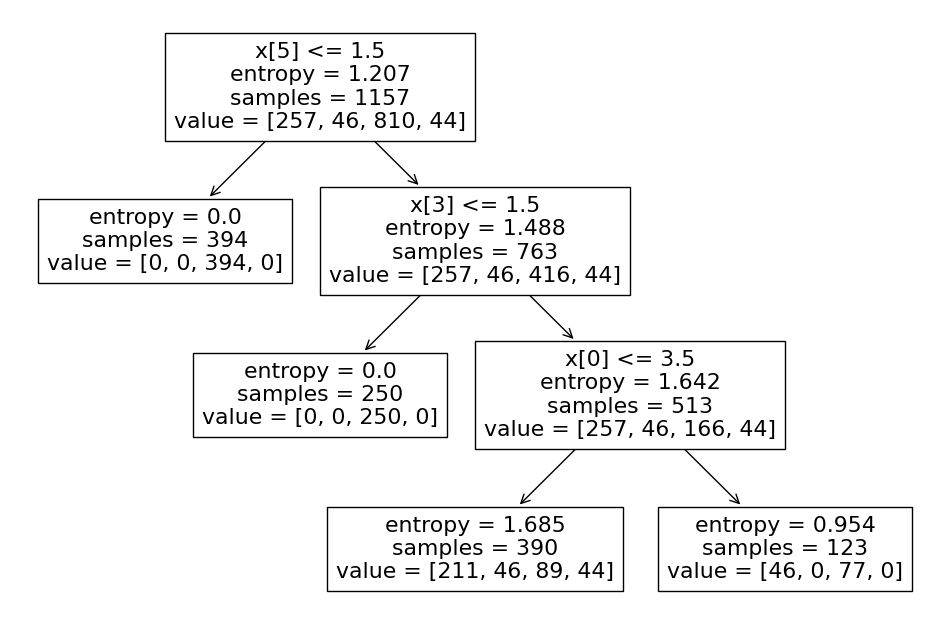

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# 9. Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


False Positives (FP) – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called Type I error.



False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.



These four outcomes are summarized in a confusion matrix given below.


In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[101   0  26   0]
 [ 23   0   0   0]
 [ 41   0 359   0]
 [ 21   0   0   0]]


# 10. Classification Report

Classification report is another way to evaluate the classification model performance. It displays the  precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.54      0.80      0.65       127
        good       0.00      0.00      0.00        23
       unacc       0.93      0.90      0.91       400
       vgood       0.00      0.00      0.00        21

    accuracy                           0.81       571
   macro avg       0.37      0.42      0.39       571
weighted avg       0.77      0.81      0.78       571

